## Centroid Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [23]:
df.loc[(df['Genre'] == 'Male'),'Sex'] = '0'

In [22]:
df.loc[(df['Genre'] == 'Female'),'Sex'] = '1'

In [32]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(df.drop(['Genre'],axis=1))

In [43]:
data_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783,  0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992,  0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627,  0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298,  0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436,  0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767, -1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002,  0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 , -1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216,  0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894,  0.88640526],
       [-1.49824268, -1.06573534, -1.5

- elbow rule

In [36]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [41]:
%matplotlib inline
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Annual Income (k$)')
    plt.show() 

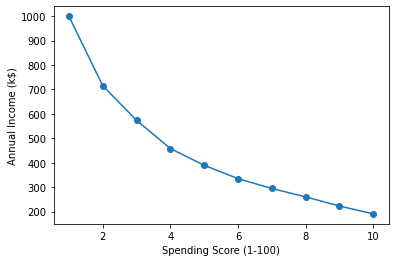

In [42]:
plot_distortion(data_scaled)

* fit model with optimal number of clusters

In [58]:
#Fitting data into K-Means model with 3 clusters
km=KMeans(n_clusters=3)
km.fit(data_scaled)
print(km.cluster_centers_)

[[-0.48768665  1.11866328 -0.44004581 -0.39052064 -0.05791853]
 [-0.90562646 -0.9286097  -0.86859989  0.33053786  0.20289471]
 [ 1.02408784 -0.24490383  0.96005657  0.08104001 -0.09569148]]


In [59]:
# count of points in each cluster
pd.Series(km.labels_).value_counts()

2    80
0    64
1    56
dtype: int64

In [53]:
y_km=km.fit_predict(data_scaled)

* define function plot_clusters

In [56]:
# define function 
def plot_clusters(data_scaled,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = data_scaled[y_res == cluster,0]
        y = data_scaled[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

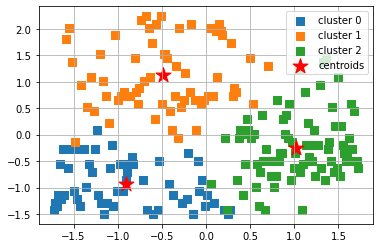

In [57]:
plot_clusters(data_scaled,y_km, plt_cluster_centers= True)